<a href="https://colab.research.google.com/github/NMThanh123/AI_Report/blob/main/AI_report_flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict 5 kind of flowers


In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_data():
    file = open('/content/drive/MyDrive/Colab Notebooks/Report/Data_report/pix_flower', 'rb')

    # dump information to that file
    (pixels, labels) = pickle.load(file)

    # close the file
    file.close()

    print(pixels.shape)
    print(labels.shape)

    return pixels, labels

images, labels = load_data()

(4317, 224, 224, 3)
(4317, 5)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state = 10)
X = X_test

In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides = (1,1), padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(512, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(Conv2D(512, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0002), metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_36 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_38 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                 

In [ ]:
aug = ImageDataGenerator(rotation_range=20,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [ ]:
h = model.fit_generator(aug.flow(X_train, y_train, batch_size=64), epochs=30, validation_data=aug.flow(X_test,y_test, batch_size=64), verbose=1)

<ipython-input-16-f073caf59ae3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h = model.fit_generator(aug.flow(X_train, y_train, batch_size=64), epochs=30, validation_data=aug.flow(X_test,y_test, batch_size=64), verbose=1)


Epoch 1/30
54/54 [==============================] - 64s 1s/step - loss: 1.4711 - accuracy: 0.3354 - val_loss: 1.2150 - val_accuracy: 0.4676
Epoch 2/30
54/54 [==============================] - 55s 1s/step - loss: 1.2127 - accuracy: 0.4778 - val_loss: 1.1172 - val_accuracy: 0.5255
Epoch 3/30
54/54 [==============================] - 55s 1s/step - loss: 1.1037 - accuracy: 0.5418 - val_loss: 1.0366 - val_accuracy: 0.5833
Epoch 4/30
54/54 [==============================] - 54s 1s/step - loss: 1.0058 - accuracy: 0.5946 - val_loss: 0.9738 - val_accuracy: 0.6343
Epoch 5/30
54/54 [==============================] - 56s 1s/step - loss: 0.9187 - accuracy: 0.6496 - val_loss: 0.8792 - val_accuracy: 0.6782
Epoch 6/30
54/54 [==============================] - 55s 1s/step - loss: 0.8663 - accuracy: 0.6675 - val_loss: 0.8415 - val_accuracy: 0.6887
Epoch 7/30
54/54 [==============================] - 55s 1s/step - loss: 0.8693 - accuracy: 0.6670 - val_loss: 0.8721 - val_accuracy: 0.6921
Epoch 8/30
54/54 [==

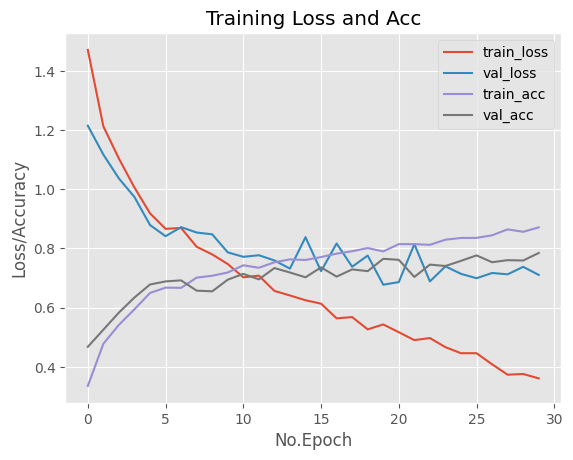

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), h.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 30), h.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 30), h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Acc")
plt.xlabel("No.Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Report/Model_AI/model_flower.h5')

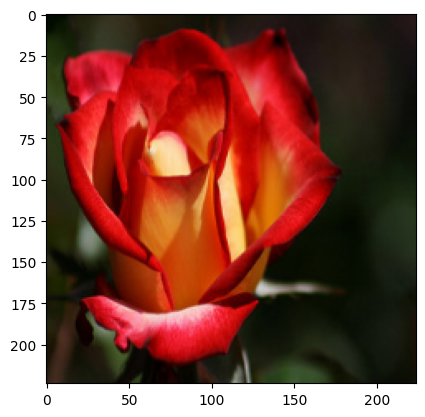

1/1 [==============================] - 0s 21ms/step
This picture is:  rose [3.0184705e-03 4.0377154e-06 8.8971502e-01 5.9541195e-05 1.0720304e-01]


In [ ]:
class_name = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
image = X[455]
plt.style.use('default')
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(c)
plt.show()

img = X_test[455]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
# print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
# print(np.max(result[0],axis=0))